**Alzheimers** **and** **MRI**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from google.colab import files
uploaded = files.upload()


Saving oasis_longitudinal.csv to oasis_longitudinal.csv


In [3]:
sns.set()

In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['oasis_longitudinal.csv']))

In [5]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [6]:
print(df.min()) 

Subject ID        OAS2_0001
MRI ID        OAS2_0001_MR1
Group             Converted
Visit                     1
MR Delay                  0
M/F                       F
Hand                      R
Age                      60
EDUC                      6
SES                     1.0
MMSE                    4.0
CDR                     0.0
eTIV                   1106
nWBV                  0.644
ASF                   0.876
dtype: object


In [7]:
print(df.max())

Subject ID        OAS2_0186
MRI ID        OAS2_0186_MR3
Group           Nondemented
Visit                     5
MR Delay               2639
M/F                       M
Hand                      R
Age                      98
EDUC                     23
SES                     5.0
MMSE                   30.0
CDR                     2.0
eTIV                   2004
nWBV                  0.837
ASF                   1.587
dtype: object


In [8]:
print(df.mean())

Visit          1.882038
MR Delay     595.104558
Age           77.013405
EDUC          14.597855
SES            2.460452
MMSE          27.342318
CDR            0.290885
eTIV        1488.128686
nWBV           0.729568
ASF            1.195461
dtype: float64


<ipython-input-8-f98cceecb4a0>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.mean())


In [9]:
df = df.loc[df['Visit']==1] # use first visit data only because of the analysis we're doing
df = df.reset_index(drop=True) # reset index after filtering first visit data

df['M/F'] = df['M/F'].replace(['F','M'], [0,1]) # F/M column

df['Group'] = df['Group'].replace(['Converted'], ['Demented']) # Target variable

df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0]) # Target variable

df = df.drop(['MRI ID', 'Visit', 'Hand'], axis=1) 
# These columns are not needed for this analysis. "Hand" is not need as all are right handed.


In [10]:
def bar_chart(feature):
    Demented = df[df['Group']==1][feature].value_counts()
    Nondemented = df[df['Group']==0][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,6))


Text(0.5, 1.0, 'Gender and Demented rate')

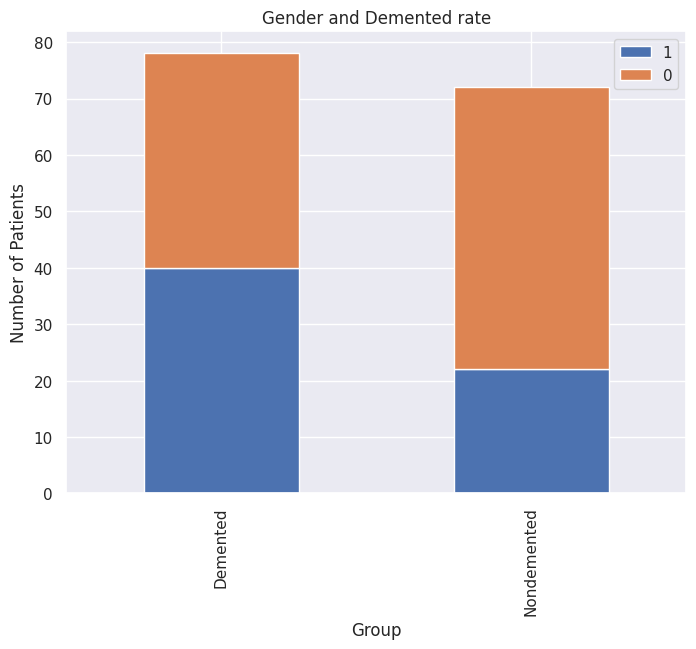

In [11]:
bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of Patients')
plt.legend()
plt.title('Gender and Demented rate')
# 0 being female and 1 being male

men are more likely to be demeted than women. 

(15.3, 30.0)

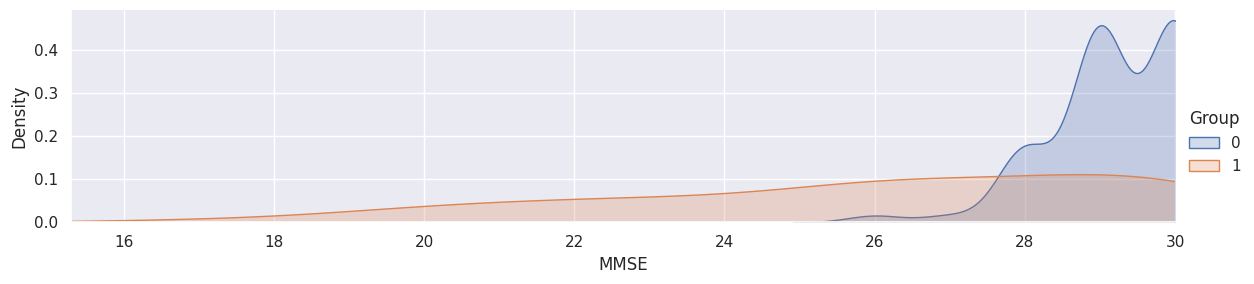

In [30]:
#MMSE : Mini Mental State Examination
facet= sns.FacetGrid(df,hue="Group", aspect=4)
facet.map(sns.kdeplot,'MMSE',fill= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(15.30)
# Nondemented is 0, Demented is 1

Nondemeted subjects scored higer than demeted subjects

(0.5, 2.0)

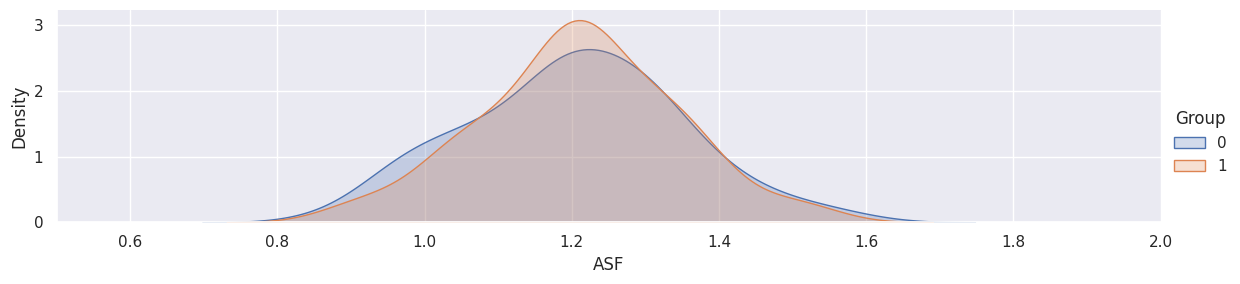

In [29]:
#ASF = Atlas Scaling Factor
facet= sns.FacetGrid(df,hue="Group", aspect=4)
facet.map(sns.kdeplot,'ASF',fill= True)
facet.set(xlim=(0, df['ASF'].max()))
facet.add_legend()
plt.xlim(0.5, 2)

Nondemeted group had higher brain volume

(1000.0, 2100.0)

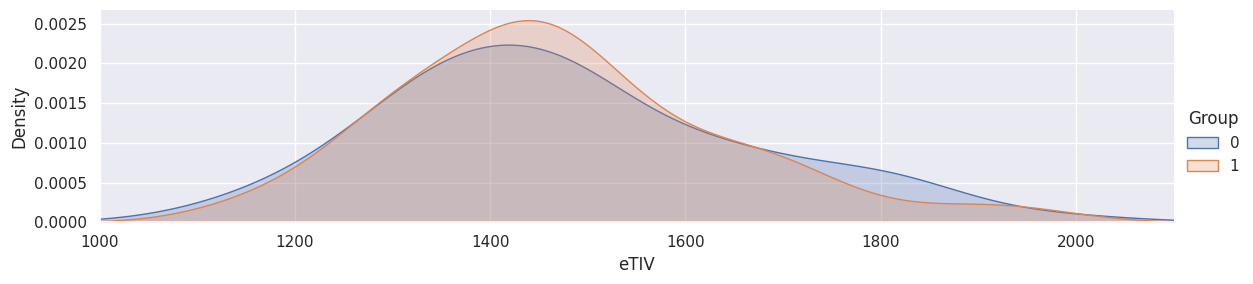

In [28]:
#eTIV = Estimated Total Intracranial Volume
facet= sns.FacetGrid(df,hue="Group", aspect=4)
facet.map(sns.kdeplot,'eTIV',fill= True)
facet.set(xlim=(0, df['eTIV'].max()))
facet.add_legend()
plt.xlim(1000, 2100)

Nondemeted had higher brain volume

(0.6, 0.9)

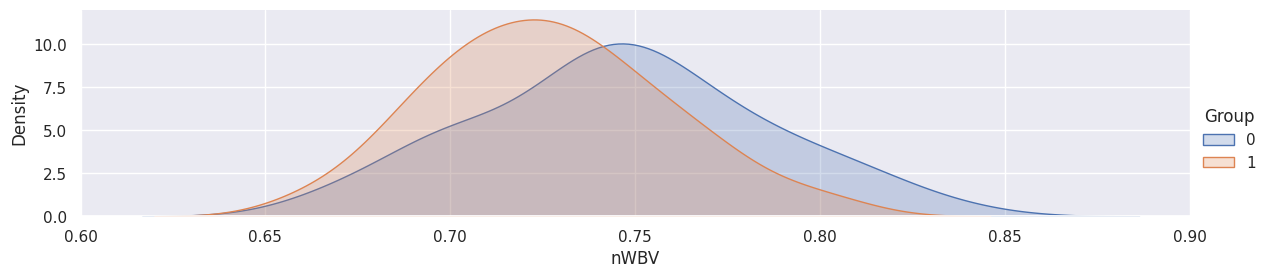

In [27]:
#nWBV = Normalized Whole Brain Volume
facet= sns.FacetGrid(df,hue="Group", aspect=4)
facet.map(sns.kdeplot,'nWBV',fill= True)
facet.set(xlim=(0, df['nWBV'].max()))
facet.add_legend()
plt.xlim(0.6,0.9)
# Nondemented is 0, Demented is 1

Nondemeted had higher brain volume. 

(0.0, 0.2)

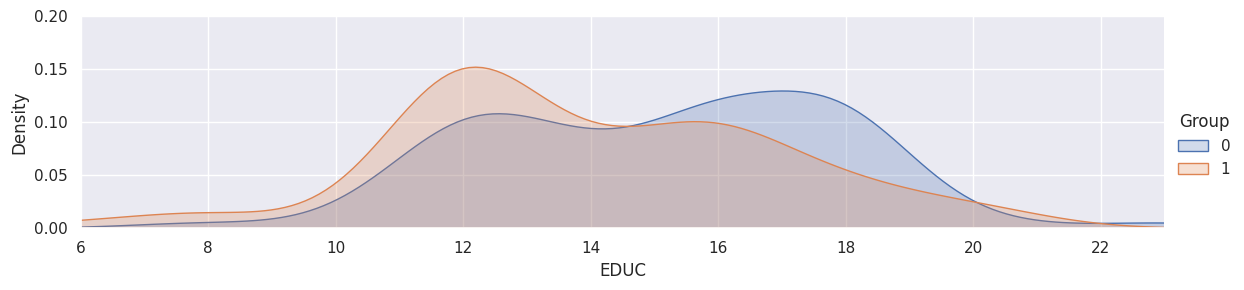

In [26]:
#'EDUC' = Years of Education
facet= sns.FacetGrid(df,hue="Group", aspect=4)
facet.map(sns.kdeplot,'EDUC',fill= True)
facet.set(xlim=(df['EDUC'].min(), df['EDUC'].max()))
facet.add_legend()
plt.ylim(0, 0.20)
# Nondemented is 0, Demented is 1

Demeted subjects seem to be less educated

(50.0, 100.0)

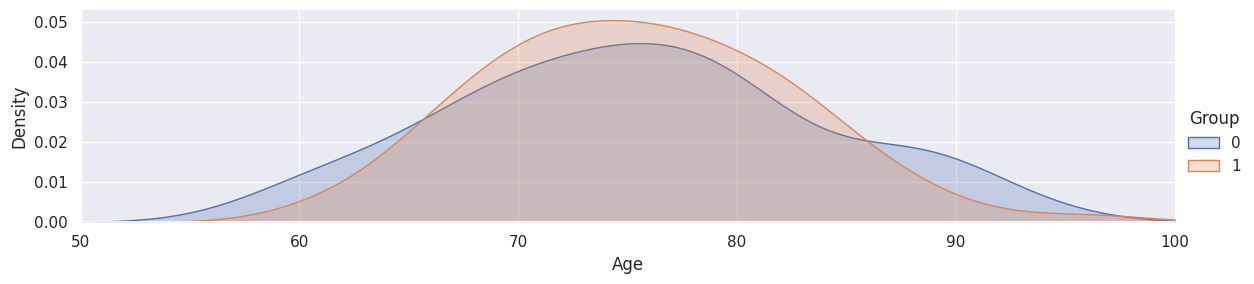

In [31]:
#AGE. Nondemented =0, Demented =1
facet= sns.FacetGrid(df,hue="Group", aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(50,100)

There was more demeted patients in the 70 to 80 age range than non demeted patients

<ipython-input-62-194b19db0ad2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_obj = df_dropna.corr()


<Axes: >

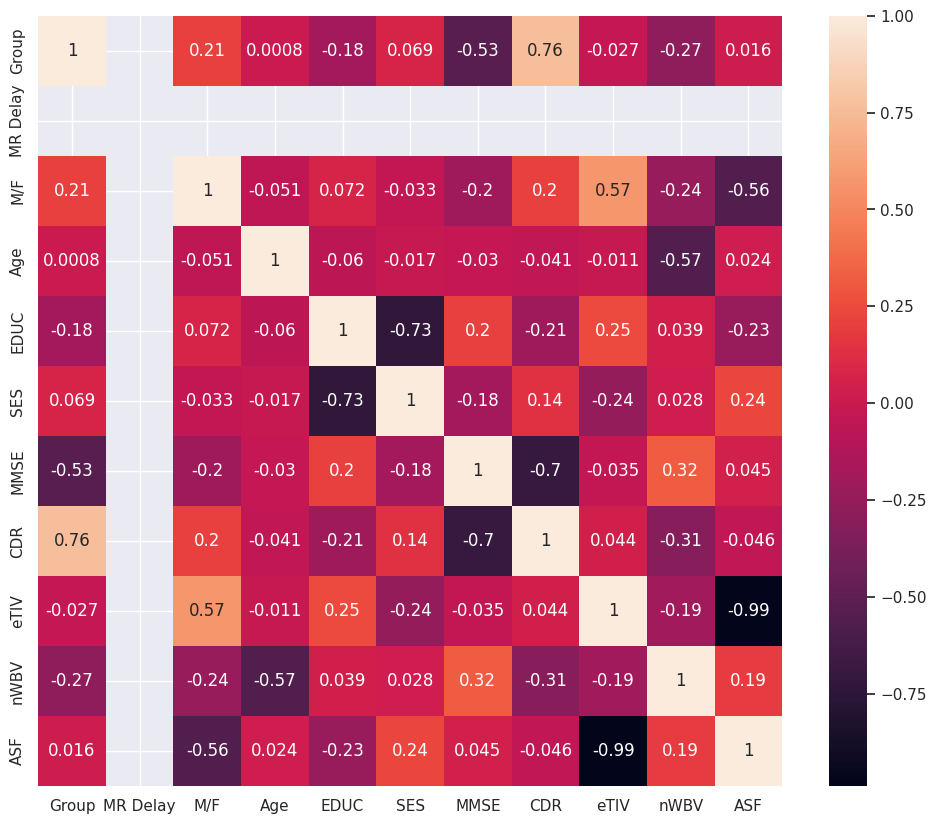

In [62]:
corr_obj = df_dropna.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_obj, xticklabels=corr_obj.columns.values, yticklabels=corr_obj.columns.values, annot=True)

<ipython-input-64-40177500d86d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='pearson').abs()


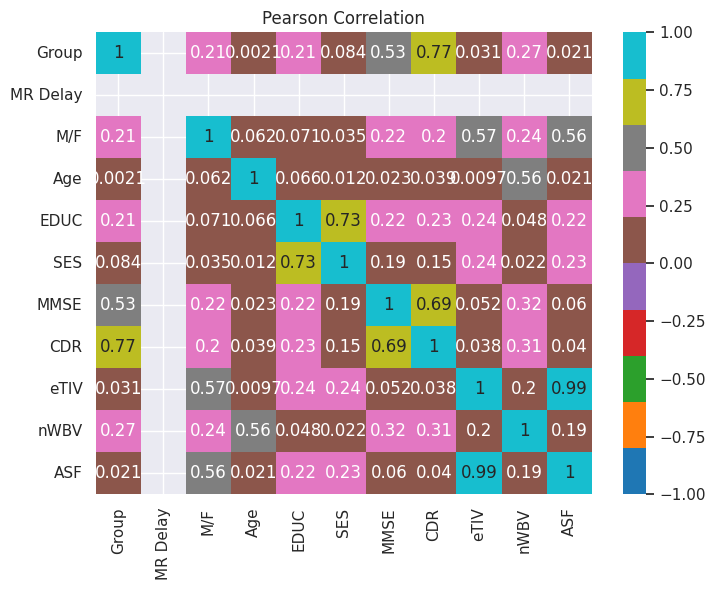

In [64]:
corr = df.corr(method='pearson').abs()
fig = plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='tab10', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')
plt.show()

**Data Preprocessing**

In [32]:
pd.isnull(df).sum() 

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           8
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

8 missing values in SES

In [33]:
df_dropna = df.dropna(axis=0, how='any')
pd.isnull(df_dropna).sum()

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

Dropped the 8 rows of missing values. 

In [34]:
df_dropna['Group'].value_counts()

0    72
1    70
Name: Group, dtype: int64

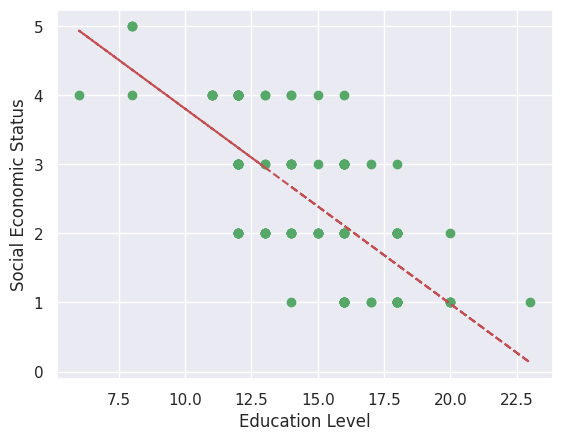

In [36]:
x = df['EDUC']
y = df['SES']

ses_not_null_index = y[~y.isnull()].index
x = x[ses_not_null_index]
y = y[ses_not_null_index]

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, y, 'go', x, p(x), "r--")
plt.xlabel('Education Level')
plt.ylabel('Social Economic Status')

plt.show()

In [38]:
df.groupby(['EDUC'])['SES'].median()

EDUC
6     4.0
8     5.0
11    4.0
12    3.0
13    2.0
14    3.0
15    2.0
16    2.0
17    1.0
18    2.0
20    1.0
23    1.0
Name: SES, dtype: float64

In [39]:
df["SES"].fillna(df.groupby("EDUC")["SES"].transform("median"), inplace=True)
pd.isnull(df['SES']).value_counts()

False    150
Name: SES, dtype: int64

No more missing values.

**Split data into training, validation, testing**

In [42]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score

In [44]:
# no change to values 
Y = df['Group'].values # Target for the model
X = df[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] # Features

# splitting into three sets
X_trainval, X_test, Y_trainval, Y_test = train_test_split(X, Y, random_state=0)

# Feature scaling
scaler = MinMaxScaler().fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)

In [45]:
#missing values input
Y = df_dropna['Group'].values # Target for the model
X = df_dropna[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] # Features

# splitting into three sets
X_trainval_d, X_test_d, Y_trainval_d, Y_test_d = train_test_split(X, Y, random_state=0)

# Feature scaling
scaler = MinMaxScaler().fit(X_trainval_d)
X_trainval_scaled_d = scaler.transform(X_trainval_d)
X_test_scaled_d = scaler.transform(X_test_d)


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc

In [48]:
acc = [] # list to store all performance metric

In [52]:
best_score=0
kfolds=5 # set the number of folds

for c in [0.001, 0.1, 1, 10, 100]:
    logRegModel = LogisticRegression(C=c)
    #cross-validation
    scores = cross_val_score(logRegModel, X_trainval, Y_trainval, cv=kfolds, scoring='accuracy') # Get recall for each parameter
    #mean cross-validation accuracy
    score = np.mean(scores)
    #best parameters and score
    if score > best_score:
        best_score = score
        best_parameters = c

#combined training and validation set
SelectedLogRegModel = LogisticRegression(C=best_parameters).fit(X_trainval_scaled, Y_trainval)
test_score = SelectedLogRegModel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedLogRegModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("accuracy on validation set is", best_score)
print("parameter for regularization C", best_parameters)
print("Test accuracy for best C parameter", test_score)
print("Test recall for best C parameter", test_recall)
print("Test AUC for best C parameter", test_auc)
m = 'Logistic Regression (with imputation)'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

accuracy on validation set is 0.733596837944664
parameter for regularization C 100
Test accuracy for best C parameter 0.7894736842105263
Test recall for best C parameter 0.7
Test AUC for best C parameter 0.7944444444444444


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
#SVM
best_score = 0
kfolds=5
for c_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    for gamma_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: 
        for k_parameter in ['rbf', 'linear', 'poly', 'sigmoid']: 
            svmModel = SVC(kernel=k_parameter, C=c_paramter, gamma=gamma_paramter) #define the model
            #cross-validation
            scores = cross_val_score(svmModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')
            score = np.mean(scores)
            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score
                best_parameter_c = c_paramter
                best_parameter_gamma = gamma_paramter
                best_parameter_k = k_parameter
#model with best parameters to get score 
SelectedSVMmodel = SVC(C=best_parameter_c, gamma=best_parameter_gamma, kernel=best_parameter_k).fit(X_trainval_scaled, Y_trainval)
test_score = SelectedSVMmodel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedSVMmodel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("accuracy on cross validation set", best_score)
print("parameter for c", best_parameter_c)
print("parameter for gamma", best_parameter_gamma)
print("parameter for kernel", best_parameter_k)
print("accuracy with the best parameters", test_score)
print("recall with the best parameters", test_recall)
print("AUC with the best parameter", test_auc)

m = 'SVM'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

accuracy on cross validation set 0.7687747035573123
parameter for c 100
parameter for gamma 0.1
parameter for kernel rbf
accuracy with the best parameters 0.8157894736842105
recall with the best parameters 0.7
AUC with the best parameter 0.8222222222222222


In [60]:
best_score = 0
kfolds=5

for md in range(1, 10): #iterate different maximum depth values
    #train model
    treeModel = DecisionTreeClassifier(random_state=0, max_depth=md, criterion='gini')
    #cross validation
    scores = cross_val_score(treeModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')
    #mean cross validation for accuracy
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameter = md     
SelectedDTModel = DecisionTreeClassifier(max_depth=best_parameter).fit(X_trainval_scaled, Y_trainval)
test_score = SelectedDTModel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedDTModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("accuracy on validation set", best_score)
print("Test accuracy with best parameter", test_score)
print("Test recall with best parameters", test_recall)
print("Test AUC with the best parameter", test_auc)

m = 'Decision Tree'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

print("Important features ")
np.array([X.columns.values.tolist(), list(SelectedDTModel.feature_importances_)]).T

accuracy on validation set 0.7770750988142293
Test accuracy with best parameter 0.8157894736842105
Test recall with best parameters 0.65
Test AUC with the best parameter 0.825
Important features 


array([['M/F', '0.0'],
       ['Age', '0.0'],
       ['EDUC', '0.0'],
       ['SES', '0.0'],
       ['MMSE', '1.0'],
       ['eTIV', '0.0'],
       ['nWBV', '0.0'],
       ['ASF', '0.0']], dtype='<U32')

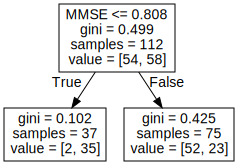

In [57]:
from sklearn.tree import export_graphviz
import graphviz 
dot_data=export_graphviz(SelectedDTModel, feature_names=X_trainval.columns.values.tolist(),out_file=None)
tree = graphviz.Source(dot_data)  
tree